# Plot the distribution of out-degrees of nodes in the network on a loglog scale. Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with out-degree equal to x. Restrict the range of x between the minimum and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes.

Imports.

In [15]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import requests

Downloading and writing data into file.

In [16]:
url = 'http://snap.stanford.edu/data/wiki-Vote.txt.gz'
r = requests.get(url, allow_redirects=True)
data_file = open('wiki-Vote.txt.gz', 'wb').write(r.content)

Reading network data into directed graph using networkx.

In [17]:
wiki_vote_graph = nx.read_edgelist('wiki-Vote.txt.gz', comments='#', create_using=nx.DiGraph(), nodetype = int)

Getting outdegree nodes and calculating how many nodes have given out degree value.

In [18]:
out_degrees = dict(wiki_vote_graph.out_degree()) # dictionary node:degree
# filtering nodes outdegree values with outdegree > 0
pos_out_degree_vals = list(filter(lambda val: val > 0, out_degrees.values()))
# getting unique and sorted outdegree values
uq_pos_out_degree_vals = sorted(set(pos_out_degree_vals))
# counting frequency of each outdegree values
out_hist = [pos_out_degree_vals.count(x) for x in uq_pos_out_degree_vals]

Plotting outdegree distribution with loglog scale.

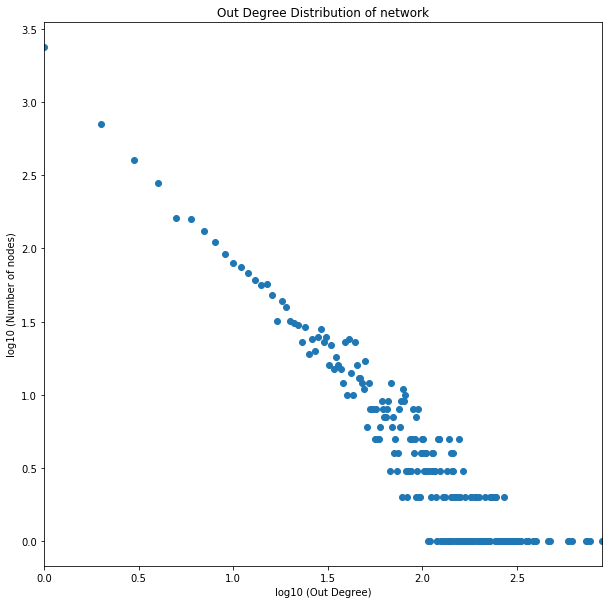

In [19]:
import numpy as np

x = np.asarray(uq_pos_out_degree_vals, dtype = float)
y = np.asarray(out_hist, dtype = float)

logx = np.log10(x)
logy = np.log10(y)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
out_degree_dist = plt.plot(logx, logy, 'o')

# Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot. Note we want to find coefficients a and b such that the function log10 y = a · log10 x + b, equivalently, y = 10b · xa, best fits the outdegree distribution. What are the coefficients a and b? For this part, you might want to use the method called polyfit in NumPy with deg parameter equal to 1.

a: -1.2810647056745659
b: 3.1324547044999127


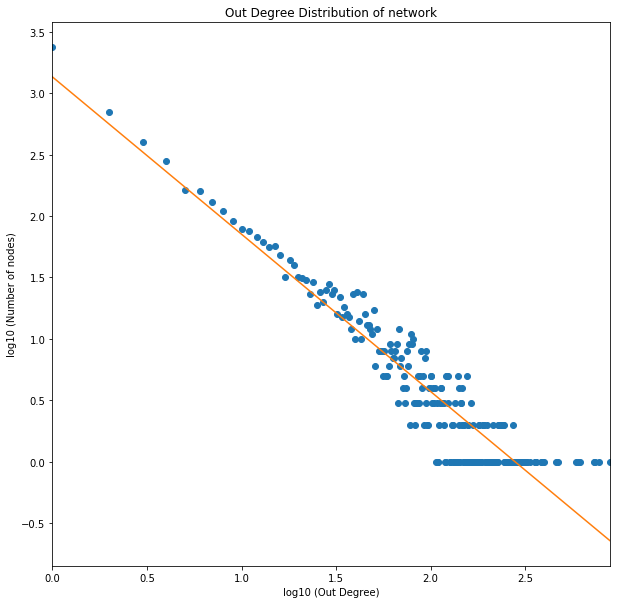

In [20]:
from scipy.stats import linregress

a, b = np.polyfit(logx, logy, 1)

plt.figure(figsize=(10,10))
plt.xlim(min(logx), max(logx))
plt.xlabel('log10 (Out Degree)')
plt.ylabel('log10 (Number of nodes)')
plt.title('Out Degree Distribution of network')
scatter_plot = plt.plot(logx, logy, 'o')
scatter_plot_regression = plt.plot(logx, a*logx + b)

print("a: " + str(a))
print("b: " + str(b))

# In a k-Cayley tree, what is the number of nodes reachable in d steps from the central node?

## Answer:

For k = 3,

At d=1 (one step away) we can reach, 3\*(3-1)^(1-1) = 3\*(2)^0 = 3.

Similarly, at d=2 we can reach, 3\*(3-1)^(2-1) = 3\*(2)^1 = 6.

Similarly, at d=3 we can reach, 3\*(3-1)^(3-1) = 3\*(2)^2 = 12.

Similarly, at d=4 we can reach, 3\*(3-1)^(4-1) = 3\*(2)^3 = 24.

and so on.

**General Formula will be: k\*(k-1)^t-1**

# What is the diameter of such a network (in terms of k and n)?

## Answer:

The number of nodes up to distance d from central node is:

N(d) = 1 + k + k^2 + k^3 +.....+ k^d = (k^(d+1)−1)/(k−1).

If d is maximum distance i.e diameter then the number of Nodes at distance d i.e. N(d)

will be approximately equal to number of Nodes i.e. N in the network.

Similarly, If the value of k is greater than 1 and d is maximum distance / diameter, 

then k^d is approximately equal to total number of Nodes in the network i.e. N

-1 term in both numerator and denominator can be neglected from above equation as k >> 1

k^d $\approx$ N


**d $\approx$ ln(N) / ln(k)**

so diameter in terms of k and n will be approximately equal to **ln(N) / ln(k)**.


# Are such trees ‘small-world’? (i.e. does the diameter grown as logn)

## Answer:

The small-world property of a network means that any 2 randomly selected nodes can be reached from one another by ~log(N) hops. In small-world, most of the nodes are connected to each other. While in Cayley Tree, many nodes are not interconnected. For example if N = 100 then log(100) = 2, it can be seen that all the randomly selected nodes cannot be reached from one another in just 2 step. Hence, the given network does not display the small-world property.

# Are such trees ‘searchable’? Why or why not?

## Answer:

For a network to be searchable, any randomly selected node should be found in O(log(N)^$\beta$) from any source node. In Cayley Tree, search time is largely dependent on the number of steps the given node is away from the source node. Interconnectivity in Cayley Tree is very less making search time complexity to be O(N^$\alpha$). In conclusion, such trees are not searchable.

## Show that the expected degree in this model is 2c.

## Answer:

Expected Degree = (n − 1) \* p

As p = c / ((n - 1)! / ((n - 3)! \* 2!)

Expected Degree = c * 2 / (n - 2)

Hence,
Average Expected Degree $\approx$ 2 * c

# Show that the degree distribution in this model is p(k) = (e^-c) * (c^(k / 2)) / (k / 2)! if k is even. Also, what is the distribution if k is odd?

## Answer:

Suppose there are t triangle and probability of having t triangles is as follows:

p[t] = (((n - 1) C 2) / t )) * p^t * (1 - p)^((n - 1) C 2) - t) 

Note: C in above equation is for combination.


Since, value of N is very large, when we take limit with the large value of N i.e approaching infinity, we get

following equation.

p[t] $\approx$  e^-c * (c^(t) / t!)

**If the value of k is even**, then t = k / 2 as degree is double the times nuber of triangles, writing 

above equation in terms of k, we get:

**p[k] = e^-c * (c^(k/2) / (k/2)!)**

In this model, **we cannot have odd values of k as expected degree in this 
model is 2 * c as shown in the answer of Q # 3.1, so in this case p[k] = 0.**



# What is the clustering co-efficient Cn? What is limit Cn as n tends to infinity?

## Answer:

Clustering co-efficient for the given model can be defined by dividing ( number of triangles ) * 3 / (number of connected triplets). 

Let c be the average number of triangles around each node, then total number of triangles in the network will be n * c. Every triangle is counted three times as each triangle appears around three nodes.

The number of connected triplets around a node of degree k (where k = 2 * t from previous question, t is number of triangles) will be (2 * t C 2) = t * (2 * t - 1). Also, there will be N * p[t] nodes with t triangles. p[t] was calculated in previous question i.e.

p[t] $\approx$  e^-c * (c^(t) / t!)

So, total number of connected triplets in a network will be $$ \ n * 1 / e^c * \sum_{t=0}^{\infty} (\ t * (2 * t - 1) * (c^t / t!))$$ 

After solving summation we get

n * e^-c * (2*c ^ 2 + c) * e^c = n * c * (2 * c + 1)

**Clustering co-efficient = n * c / (n * c * (2 * c + 1)) = 1 / (2 * c + 1)**

When n tends to infinity the clustering co-efficient stays the same i.e. 1 / (2 * c + 1)

# Show that as a fraction of network size, the expected size S of the giant component satisfies S =1− exp(−cS(2 − S)). Is there a phase transition? If yes, when? Make sure you explain how you got the answer.

## Answer:

Size of the giant component will be S = 1 - h, where h is the probability that a node is not in the component. If a node is not in the giant component then it would be part of the network outside that component. There are ((n - 1) C 2) distinct pairs of nodes in the network outside that component. For each pair, either they do not form triangle with that node and probability of that would be 1 - p or they form a triangle with that node with probabiliy p but, both the nodes of the pair are not in the giant component so their probabilities would be h as well and collectively it would be h^2. So, probability that a nodes in not in the component is,

h = (1 - p + p * h^2) ^ ((n - 1) C 2)

As we know that p = c / ((n - 1) C 2). After Putting value of p in above equation and simultaneously taking limit of n  approaches to infiinity, we get 

**h = e^(-c * (1 - h^2))**. Note the recursion in the formula. 

Hence,

**S = 1 - h = 1 - e^(-c * (1 - h^2))**

writing above equation in terms of S by putting h = 1 - S, we get

**S = 1 - e^(-c * S * (2 - S))**

# What is the value of the clustering co-efficient when the giant component fills half of the network?

## Answer:

From formula in previous question, we can find value of c where

c = -1 * (ln(1 - S) / S * (2 - S)),

Putting S = 1/2, we get 

c = - 1 * (4/3) * ln(1/2) = (4/3) * ln(2)

Putting value of c in clustering co-efficient formula derived in Q # 3.3, we get

**C = 1 / (((8/3) * ln(2)) + 1) = 0.35**

# Generate two undirected unweighted graphs: G_er and G_pl. G_er is the Erdos-Renyi graph of 100 nodes, with p = 0.1. G_pl is a preferential model graph with n = 100 nodes (steps) and the number of edges to attach at each step m = 5. Feel free to use any package or code you find online to generate these graphs.

Generating Erdos-Renyi graph.

E:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


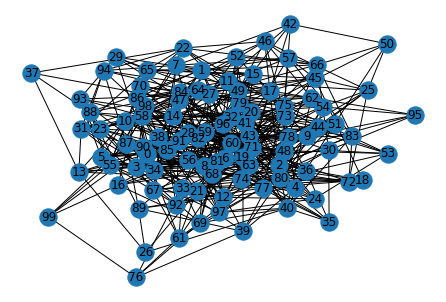

In [21]:
n = 100
p = 0.1

G_er = nx.erdos_renyi_graph(n,p) 
nx.draw(G_er, with_labels=True, seed = 1024, directed = False) 
G_er_plt = plt.show() 

Generating preferential model graph.

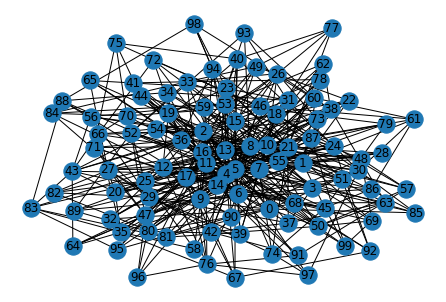

In [22]:
n = 100
m = 5

G_pl = nx.barabasi_albert_graph(n, m, seed = 1024) 
nx.draw(G_pl, with_labels=True) 
G_pl_plt = plt.show() 

# Implement the discrete-time ‘flu-like’ SIS model in your favorite language. Your code should take a graph-edge-list, the beta value, the delta value, and the max_time as input, and give the number of infected nodes at each timestep till max_time. Initialize the model with all nodes as infected at time-step 0. For our experiments, let max_time = 500.

In [23]:
# importing ndlib library modules
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

import networkx as nx

def run_SIS_Model(graph, beta, delta, max_time = 500):
    
    model = ep.SISModel(graph)
    
    fraction_of_population_infected = 0.05
    
    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', beta)
    cfg.add_model_parameter('lambda', delta)
    cfg.add_model_parameter("fraction_infected", fraction_of_population_infected)
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(max_time)
    
    return model.build_trends(iterations), model

# Implement the ACC and RAND policies. Given a budget k and a graph-edge-list, your code should output the nodes chosen according to each policy.

Implementing ACC Policy.

In [24]:
import numpy as np

np.random.seed(1000)

def acc_policy(graph, k):
    
    # randomly selected neighbors of randomly selected nodes
    acc_selection = []

    i = 0
    while i < k:
        selected_node = np.random.choice(graph.nodes())
        selected_node_neighbors = list(graph.neighbors(selected_node))
        # if selected node has neighbors
        if (len(selected_node_neighbors) > 0):
            selected_neighbor = np.random.choice(selected_node_neighbors)
            acc_selection.append(selected_neighbor)
            i += 1

    print("SELECTED NODES FROM ACC POLICY: ")
    
    print(acc_selection)
    
    return acc_selection


Implementing RAND Policy.

In [25]:

def rand_policy(graph, k):
    
    # randomly selected nodes
    rand_selection = []

    i = 0
    while i < k:
        selected_node = np.random.choice(graph.nodes())
        rand_selection.append(selected_node)
        i += 1

    print("SELECTED NODES FROM RAND POLICY: ")
    
    print(rand_selection)
    
    return rand_selection

# Run the SIS model with beta=delta=0.2 on G_er and G_pl. Now pick k = 10 nodes according to both ACC and RAND policies for each of the two graphs. Remove these nodes, and re-run the SIS model on the new (smaller) versions of each graph. Generate two plots, one for each graph: in each, plot the S =1− exp(−cS(2 − S)) number of infections vs time when (a) no nodes have been removed (b) when nodes have been removed according to ACC and (c) when nodes have been removed according to RAND (use different colors for (a)-(b)-(c)).

### For G_er graph.

100%|██████████| 500/500 [00:00<00:00, 3246.77it/s]


SELECTED NODES FROM ACC POLICY: 
[91, 77, 17, 96, 81, 16, 34, 34, 96, 8]
SELECTED NODES FROM RAND POLICY: 
[47, 10, 63, 59, 11, 82, 37, 37, 37, 15]


100%|██████████| 500/500 [00:00<00:00, 3472.31it/s]


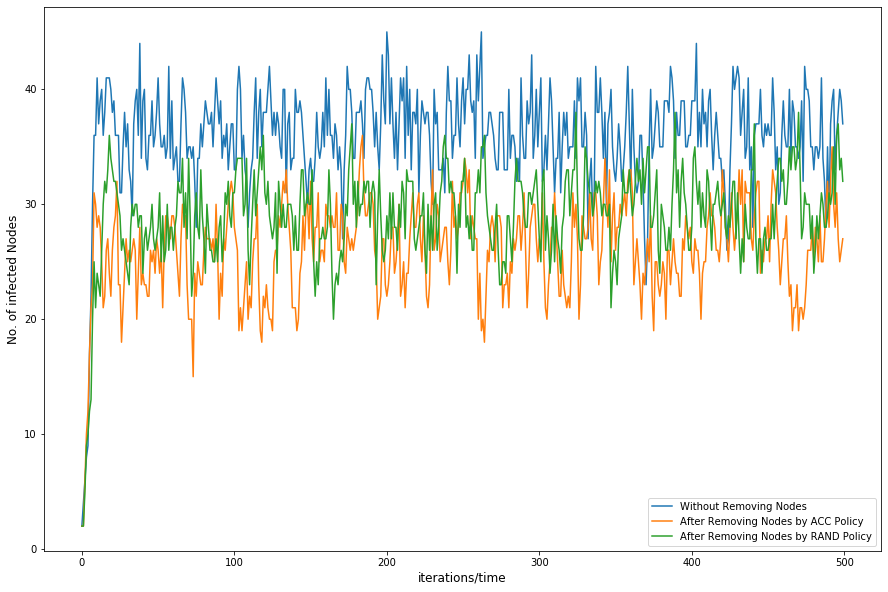

In [32]:
# running SIS Model

import copy

trends, model = run_SIS_Model(G_er, beta=0.2, delta=0.2)
no_of_infected_nodes = trends[0]['trends']['node_count'][1]

# picking nodes according ACC and RAND policy.

acc_selection = acc_policy(G_er, 10)
rand_selection = rand_policy(G_er, 10)

# removing randomly selected nodes

orig_graph_acc_er = copy.deepcopy(G_er)

orig_graph_acc_er.remove_nodes_from(acc_selection)
trends_1, model_1 = run_SIS_Model(orig_graph_acc_er, beta=0.2, delta=0.2)
no_of_infected_nodes_1 = trends_1[0]['trends']['node_count'][1]

orig_graph_rand_er = copy.deepcopy(G_er)

orig_graph_rand_er.remove_nodes_from(rand_selection)
trends_2, model_2 = run_SIS_Model(orig_graph_rand_er, beta=0.2, delta=0.2)
no_of_infected_nodes_2 = trends_2[0]['trends']['node_count'][1]

# plotting

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_xlabel('iterations/time',fontsize=12)
ax.set_ylabel('No. of infected Nodes',fontsize=12)
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes))]), no_of_infected_nodes);
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes_1))]), no_of_infected_nodes_1);
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes_2))]), no_of_infected_nodes_2);

ax.legend(["Without Removing Nodes", "After Removing Nodes by ACC Policy", "After Removing Nodes by RAND Policy"])



### For G_pl graph.

100%|██████████| 500/500 [00:00<00:00, 2783.22it/s]


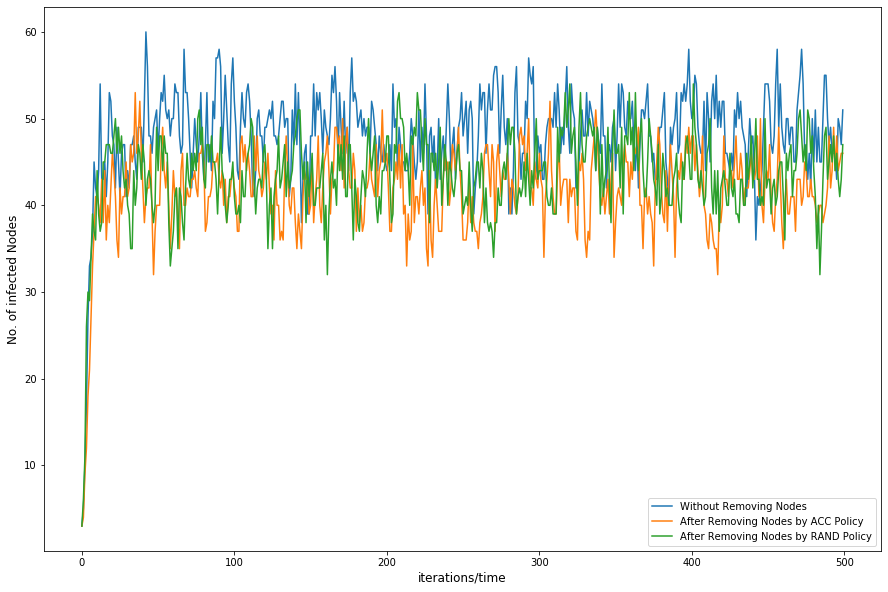

In [33]:
# running SIS Model
trends, model = run_SIS_Model(G_pl, beta=0.2, delta=0.2)
no_of_infected_nodes = trends[0]['trends']['node_count'][1]

# removing randomly selected nodes

orig_graph_acc_pl = copy.deepcopy(G_pl)

orig_graph_acc_pl.remove_nodes_from(acc_selection)
trends_1, model_1 = run_SIS_Model(orig_graph_acc_pl, beta=0.2, delta=0.2)
no_of_infected_nodes_1 = trends_1[0]['trends']['node_count'][1]

orig_graph_rand_pl = copy.deepcopy(G_pl)

orig_graph_rand_pl.remove_nodes_from(rand_selection)
trends_2, model_2 = run_SIS_Model(orig_graph_rand_pl, beta=0.2, delta=0.2)
no_of_infected_nodes_2 = trends_2[0]['trends']['node_count'][1]

# plotting

fig = plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_xlabel('iterations/time',fontsize=12)
ax.set_ylabel('No. of infected Nodes',fontsize=12)
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes))]), no_of_infected_nodes);
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes_1))]), no_of_infected_nodes_1);
ax.plot(np.array([i for i in range(0,len(no_of_infected_nodes_2))]), no_of_infected_nodes_2);

ax.legend(["Without Removing Nodes", "After Removing Nodes by ACC Policy", "After Removing Nodes by RAND Policy"])



# Q4.5. (5 points) What do you observe w.r.t. the performance of RAND and ACC on the two graphs? Explain.

## Answer:

There is no obvious difference between ACC and RAND immunization policy w.r.t to performance. If you looks at the graph closely you will see that in both of the graphs, on average, number of infected nodes after removing nodes by ACC policy is less as compared to number of infected nodes after removing nodes by RAND policy. The reason for this could be that in ACC we select random neighbor of randomly selected node, in other words we select only those nodes that have neighbors while on the other hand in RAND we select nodes randomly. In RAND, we can get nodes without neighbors and such nodes have less potential to spread virus as compared to nodes that have neighbors. Thats why after removing nodes selected by ACC the total number of infected nodes in the graph are less as we remove nodes with neighbors.